## WWC ML for Social Good Covid-19 Hackathon

### Household Pulse Survey and Mental Health

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

import boto3
import io
#from sagemaker import get_execution_role
import os
#import sagemaker.amazon.common as smac pd.set_option('display.max_rows', None)
#import sagemaker

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
# print full data frame

In [21]:
#week_2_df = pd.read_csv("pulse2020_puf_02.csv")
#week_2_df.shape

# week 1 through I think 6 only have 82 columns. We could work around that.
# but I thought it would be more simple to just choose weeks, spread out, that all
  # have the same column count
# so I uploaded week 7 to the drive and pulled it in here instead of week 2

(41996, 82)

In [112]:
week_7_df = pd.read_csv("pulse2020_puf_07.csv")
week_7_df.shape
# import week 7 data

(73472, 105)

In [14]:
list(week_7_df)

['SCRAM',
 'WEEK',
 'EST_ST',
 'EST_MSA',
 'PWEIGHT',
 'TBIRTH_YEAR',
 'ABIRTH_YEAR',
 'EGENDER',
 'AGENDER',
 'RHISPANIC',
 'AHISPANIC',
 'RRACE',
 'ARACE',
 'EEDUC',
 'AEDUC',
 'MS',
 'THHLD_NUMPER',
 'AHHLD_NUMPER',
 'THHLD_NUMKID',
 'AHHLD_NUMKID',
 'THHLD_NUMADLT',
 'WRKLOSS',
 'EXPCTLOSS',
 'ANYWORK',
 'KINDWORK',
 'RSNNOWRK',
 'UNEMPPAY',
 'EIP',
 'EIPSPND1',
 'EIPSPND2',
 'EIPSPND3',
 'EIPSPND4',
 'EIPSPND5',
 'EIPSPND6',
 'EIPSPND7',
 'EIPSPND8',
 'EIPSPND9',
 'EIPSPND10',
 'EIPSPND11',
 'EIPSPND12',
 'EIPSPND13',
 'SPNDSRC1',
 'SPNDSRC2',
 'SPNDSRC3',
 'SPNDSRC4',
 'SPNDSRC5',
 'SPNDSRC6',
 'SPNDSRC7',
 'PRIFOODSUF',
 'CURFOODSUF',
 'CHILDFOOD',
 'FOODSUFRSN1',
 'FOODSUFRSN2',
 'FOODSUFRSN3',
 'FOODSUFRSN4',
 'FOODSUFRSN5',
 'FREEFOOD',
 'WHEREFREE1',
 'WHEREFREE2',
 'WHEREFREE3',
 'WHEREFREE4',
 'WHEREFREE5',
 'WHEREFREE6',
 'WHEREFREE7',
 'TSPNDFOOD',
 'TSPNDPRPD',
 'FOODCONF',
 'HLTHSTATUS',
 'ANXIOUS',
 'WORRY',
 'INTEREST',
 'DOWN',
 'HLTHINS1',
 'HLTHINS2',
 'HLTHINS3',

In [113]:
week_9_df = pd.read_csv("pulse2020_puf_09.csv")
week_9_df.shape
# import week 9 data

(98663, 105)

In [114]:
week_12_df = pd.read_csv("pulse2020_puf_12.csv")
week_12_df.shape
# import week 12 data

(86792, 105)

In [116]:
data1 = week_7_df.append(week_9_df)
data1.shape
# stack week 7 and week 9 data frames and view shape
# can use concat function as well

(172135, 105)

In [117]:
data = data1.append(week_12_df)
data.shape
# stack data1 and week 12 data frames and view shape


(258927, 105)

In [43]:
data.head(10)
# glimpse of data frame, first 10 rows

,SCRAM,WEEK,EST_ST,EST_MSA,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,EGENDER,AGENDER,RHISPANIC,AHISPANIC,RRACE,ARACE,EEDUC,AEDUC,MS,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,AHHLD_NUMKID,THHLD_NUMADLT,WRKLOSS,EXPCTLOSS,ANYWORK,KINDWORK,RSNNOWRK,UNEMPPAY,EIP,EIPSPND1,EIPSPND2,EIPSPND3,EIPSPND4,EIPSPND5,EIPSPND6,EIPSPND7,EIPSPND8,EIPSPND9,EIPSPND10,EIPSPND11,EIPSPND12,EIPSPND13,SPNDSRC1,SPNDSRC2,SPNDSRC3,SPNDSRC4,SPNDSRC5,SPNDSRC6,SPNDSRC7,PRIFOODSUF,CURFOODSUF,CHILDFOOD,FOODSUFRSN1,FOODSUFRSN2,FOODSUFRSN3,FOODSUFRSN4,FOODSUFRSN5,FREEFOOD,WHEREFREE1,WHEREFREE2,WHEREFREE3,WHEREFREE4,WHEREFREE5,WHEREFREE6,WHEREFREE7,TSPNDFOOD,TSPNDPRPD,FOODCONF,HLTHSTATUS,ANXIOUS,WORRY,INTEREST,DOWN,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,HLTHINS8,DELAY,NOTGET,TENURE,MORTLMTH,MORTCONF,ENROLL1,ENROLL2,ENROLL3,TEACH1,TEACH2,TEACH3,TEACH4,TEACH5,COMPAVAIL,COMP1,COMP2,COMP3,INTRNTAVAIL,INTRNT1,INTRNT2,INTRNT3,TSCHLHRS,TSTDY_HRS,TTCH_HRS,INCOME
0,V050000004S70040487000121,7,42,37980.0,11169.979425,1990,2,1,2,1,2,1,2,7,2,5,2,2,0,2,2,2,1,1,1,-88,-88,1,1,1,1,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,-99,-99,-99,-99,-99,2,2,-88,1,-99,-99,-99,1,2,-88,-88,-88,-88,-88,-88,-88,500,100,2,2,2,2,2,1,1,2,2,2,2,2,2,2,1,1,1,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,5
1,V050000005S70050847100111,7,5,NaN,2323.963314,1976,2,2,2,1,2,1,2,6,2,1,4,2,2,2,2,2,2,1,2,-88,-88,3,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,1,-99,-99,-99,-99,-99,-99,1,1,-88,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,100,75,4,3,1,1,1,2,1,2,2,2,2,2,2,2,2,2,2,1,4,-99,1,-99,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,3
2,V050000008S96080333010111,7,6,NaN,14594.211515,1990,2,1,2,1,2,1,2,7,2,5,2,2,0,2,2,2,2,1,2,-88,-88,4,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,1,-99,-99,-99,-99,-99,-99,1,1,-88,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,300,200,4,3,4,4,4,4,1,2,2,2,2,2,2,2,1,1,3,1,4,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,8
3,V050010002S75120726500111,7,12,NaN,10588.543683,1951,2,2,2,1,2,1,2,6,2,3,1,2,0,2,1,1,2,1,3,-88,-88,2,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,-99,-99,1,-99,-99,-99,-99,-99,-99,1,2,-88,-99,-99,-99,-99,1,2,-88,-88,-88,-88,-88,-88,-88,204,15,2,3,1,1,1,1,1,-99,-99,-99,-99,-99,-99,-99,2,2,2,1,4,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,4
4,V050010005S30150638500111,7,15,NaN,508.324240,1943,2,1,2,1,2,1,2,6,2,5,1,2,0,2,1,2,2,2,-88,7,4,4,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,1,-99,-99,-99,-99,-99,-99,1,1,-88,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,125,0,4,3,1,1,1,1,-99,-99,1,-99,-99,-99,-99,-99,2,2,1,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,5
5,V050010006S72160696700121,7,16,NaN,1131.826329,1941,2,2,2,1,2,1,2,5,2,3,1,2,0,2,1,2,2,2,-88,7,4,3,1,-99,1,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,1,-99,-99,-99,-99,1,-99,2,2,-88,1,-99,-99,-99,-99,2,-88,-88,-88,-88,-88,-88,-88,0,60,3,4,2,2,2,2,1,2,1,2,2,2,2,2,1,1,2,1,3,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,1
6,V050010062M32132513710111,7,13,12060.0,13493.172313,1961,2,2,2,1,2,2,2,6,2,1,3,2,0,2,3,2,2,2,-88,7,4,1,1,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,-99,-99,-99,-99,-99,1,1,-88,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,50,150,4,2,1,1,1,1,1,2,2,2,2,2,2,2,2,2,1,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,4
7,V050010062M76130638400121,7,13,12060.0,17676.732201,1981,2,1,2,1,2,2,2,7,2,1,3,2,1,2,2,2,2,1,2,-88,-88,1,1,-99,1,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,-99,-99,-99,-99,-99,1,1,-88,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,50,75,4,2,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,1,4,-99,-99,1,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,8
8,V050010062M98130108500111,7,13,12060.0,7486.021100,1947,2,1,2,1,2,1,2,6,2,1,2,2,0,2,2,2,2,1,2,-88,-88,4,-88,-

In [118]:
data.drop(["SCRAM","PWEIGHT"], axis=1, inplace=True)
# drop unwanted columns
# will drop more after EDA

In [66]:
data.head()

,WEEK,EST_ST,EST_MSA,TBIRTH_YEAR,ABIRTH_YEAR,EGENDER,AGENDER,RHISPANIC,AHISPANIC,RRACE,ARACE,EEDUC,AEDUC,MS,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,AHHLD_NUMKID,THHLD_NUMADLT,WRKLOSS,EXPCTLOSS,ANYWORK,KINDWORK,RSNNOWRK,UNEMPPAY,EIP,EIPSPND1,EIPSPND2,EIPSPND3,EIPSPND4,EIPSPND5,EIPSPND6,EIPSPND7,EIPSPND8,EIPSPND9,EIPSPND10,EIPSPND11,EIPSPND12,EIPSPND13,SPNDSRC1,SPNDSRC2,SPNDSRC3,SPNDSRC4,SPNDSRC5,SPNDSRC6,SPNDSRC7,PRIFOODSUF,CURFOODSUF,CHILDFOOD,FOODSUFRSN1,FOODSUFRSN2,FOODSUFRSN3,FOODSUFRSN4,FOODSUFRSN5,FREEFOOD,WHEREFREE1,WHEREFREE2,WHEREFREE3,WHEREFREE4,WHEREFREE5,WHEREFREE6,WHEREFREE7,TSPNDFOOD,TSPNDPRPD,FOODCONF,HLTHSTATUS,ANXIOUS,WORRY,INTEREST,DOWN,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,HLTHINS8,DELAY,NOTGET,TENURE,MORTLMTH,MORTCONF,ENROLL1,ENROLL2,ENROLL3,TEACH1,TEACH2,TEACH3,TEACH4,TEACH5,COMPAVAIL,COMP1,COMP2,COMP3,INTRNTAVAIL,INTRNT1,INTRNT2,INTRNT3,TSCHLHRS,TSTDY_HRS,TTCH_HRS,INCOME
0,7,42,37980.0,1990,2,1,2,1,2,1,2,7,2,5,2,2,0,2,2,2,1,1,1,-88,-88,1,1,1,1,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,-99,-99,-99,-99,-99,2,2,-88,1,-99,-99,-99,1,2,-88,-88,-88,-88,-88,-88,-88,500,100,2,2,2,2,2,1,1,2,2,2,2,2,2,2,1,1,1,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,5
1,7,5,NaN,1976,2,2,2,1,2,1,2,6,2,1,4,2,2,2,2,2,2,1,2,-88,-88,3,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,1,-99,-99,-99,-99,-99,-99,1,1,-88,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,100,75,4,3,1,1,1,2,1,2,2,2,2,2,2,2,2,2,2,1,4,-99,1,-99,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,3
2,7,6,NaN,1990,2,1,2,1,2,1,2,7,2,5,2,2,0,2,2,2,2,1,2,-88,-88,4,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,1,-99,-99,-99,-99,-99,-99,1,1,-88,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,300,200,4,3,4,4,4,4,1,2,2,2,2,2,2,2,1,1,3,1,4,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,8
3,7,12,NaN,1951,2,2,2,1,2,1,2,6,2,3,1,2,0,2,1,1,2,1,3,-88,-88,2,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,-99,-99,1,-99,-99,-99,-99,-99,-99,1,2,-88,-99,-99,-99,-99,1,2,-88,-88,-88,-88,-88,-88,-88,204,15,2,3,1,1,1,1,1,-99,-99,-99,-99,-99,-99,-99,2,2,2,1,4,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,4
4,7,15,NaN,1943,2,1,2,1,2,1,2,6,2,5,1,2,0,2,1,2,2,2,-88,7,4,4,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,1,-99,-99,-99,-99,-99,-99,1,1,-88,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,125,0,4,3,1,1,1,1,-99,-99,1,-99,-99,-99,-99,-99,2,2,1,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,5


In [119]:
data.columns = data.columns.str.lower()
# convert column names into lower case

In [68]:
data.tail()

,week,est_st,est_msa,tbirth_year,abirth_year,egender,agender,rhispanic,ahispanic,rrace,arace,eeduc,aeduc,ms,thhld_numper,ahhld_numper,thhld_numkid,ahhld_numkid,thhld_numadlt,wrkloss,expctloss,anywork,kindwork,rsnnowrk,unemppay,eip,eipspnd1,eipspnd2,eipspnd3,eipspnd4,eipspnd5,eipspnd6,eipspnd7,eipspnd8,eipspnd9,eipspnd10,eipspnd11,eipspnd12,eipspnd13,spndsrc1,spndsrc2,spndsrc3,spndsrc4,spndsrc5,spndsrc6,spndsrc7,prifoodsuf,curfoodsuf,childfood,foodsufrsn1,foodsufrsn2,foodsufrsn3,foodsufrsn4,foodsufrsn5,freefood,wherefree1,wherefree2,wherefree3,wherefree4,wherefree5,wherefree6,wherefree7,tspndfood,tspndprpd,foodconf,hlthstatus,anxious,worry,interest,down,hlthins1,hlthins2,hlthins3,hlthins4,hlthins5,hlthins6,hlthins7,hlthins8,delay,notget,tenure,mortlmth,mortconf,enroll1,enroll2,enroll3,teach1,teach2,teach3,teach4,teach5,compavail,comp1,comp2,comp3,intrntavail,intrnt1,intrnt2,intrnt3,tschlhrs,tstdy_hrs,ttch_hrs,income
86787,12,56,NaN,1999,2,1,2,1,2,1,2,3,2,5,4,2,0,2,4,2,2,1,2,-88,-88,1,1,-99,-99,-99,-99,1,-99,-99,1,-99,-99,-99,-99,1,-99,-99,-99,-99,-99,-99,1,1,-88,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,400,50,2,4,1,1,1,1,1,2,2,2,2,2,2,2,2,1,3,1,4,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,3
86788,12,56,NaN,1959,2,2,2,1,1,4,2,7,2,3,1,2,0,2,1,2,2,1,1,-88,-88,2,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,-99,-99,1,-99,-99,-99,-99,-99,-99,1,1,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,-88
86789,12,56,NaN,1958,2,2,2,1,2,1,2,4,2,3,1,2,0,2,1,2,2,1,4,-88,-88,1,1,-99,-99,-99,-99,1,-99,-99,-99,-99,-99,-99,-99,1,-99,1,-99,-99,-99,-99,1,2,-88,-99,-99,-99,-99,1,2,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,-88
86790,12,56,NaN,1966,2,1,2,1,2,1,2,4,2,3,1,2,0,2,1,2,1,1,2,-88,-88,1,1,1,1,-99,-99,1,-99,-99,-99,-99,-99,-99,-99,1,-99,1,-99,-99,-99,-99,1,2,-88,-99,-99,1,-99,-99,2,-88,-88,-88,-88,-88,-88,-88,500,200,2,2,2,2,2,1,1,1,2,2,2,1,2,-99,1,2,3,1,2,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,2
86791,12,56,NaN,1974,2,1,2,1,2,1,2,5,2,3,1,2,0,2,1,1,1,1,2,-88,-88,2,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,-99,-99,-99,-99,1,-99,-99,-99,-99,3,2,-88,-99,-99,-99,-99,1,2,-88,-88,-88,-88,-88,-88,-88,500,50,2,2,2,2,3,2,1,-99,-99,-99,-99,-99,-99,-99,2,2,3,2,2,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,3


In [100]:
data.isnull().sum()
# nas in column est_msa = metropolitan statistical area zipcode
# -99 means seen but category not selected
# -88 means missing, did not report

week             0     
est_st           0     
est_msa          179962
tbirth_year      0     
abirth_year      0     
egender          0     
agender          0     
rhispanic        0     
ahispanic        0     
rrace            0     
arace            0     
eeduc            0     
aeduc            0     
ms               0     
thhld_numper     0     
ahhld_numper     0     
thhld_numkid     0     
ahhld_numkid     0     
thhld_numadlt    0     
wrkloss          0     
expctloss        0     
anywork          0     
kindwork         0     
rsnnowrk         0     
unemppay         0     
eip              0     
eipspnd1         0     
eipspnd2         0     
eipspnd3         0     
eipspnd4         0     
eipspnd5         0     
eipspnd6         0     
eipspnd7         0     
eipspnd8         0     
eipspnd9         0     
eipspnd10        0     
eipspnd11        0     
eipspnd12        0     
eipspnd13        0     
spndsrc1         0     
spndsrc2         0     
spndsrc3        

In [71]:
data.dtypes
# some of our columns are ordinal like worry and anxious. the answers are on a scale, order matters. 
# a few are open ended survey questions and continuous integers like tspndfood and tspndprpd
# some are nominal variables like race and hlthins1: discrete with no relationhip between categories. 
  # we may want to one hot encode those
# most of our columns are truly categorical but have been converted to numerical
# most ML algorithms take numerical input 
# https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/ 

week             int64  
est_st           int64  
est_msa          float64
tbirth_year      int64  
abirth_year      int64  
egender          int64  
agender          int64  
rhispanic        int64  
ahispanic        int64  
rrace            int64  
arace            int64  
eeduc            int64  
aeduc            int64  
ms               int64  
thhld_numper     int64  
ahhld_numper     int64  
thhld_numkid     int64  
ahhld_numkid     int64  
thhld_numadlt    int64  
wrkloss          int64  
expctloss        int64  
anywork          int64  
kindwork         int64  
rsnnowrk         int64  
unemppay         int64  
eip              int64  
eipspnd1         int64  
eipspnd2         int64  
eipspnd3         int64  
eipspnd4         int64  
eipspnd5         int64  
eipspnd6         int64  
eipspnd7         int64  
eipspnd8         int64  
eipspnd9         int64  
eipspnd10        int64  
eipspnd11        int64  
eipspnd12        int64  
eipspnd13        int64  
spndsrc1         int64  


In [121]:
data.info

In [76]:
#d = {-88:"NaN",-99:0}
#data = data.replace(d)
# one way to handle "missing" data above for example
# replacing missing data with 0 is most often not the right answer. But since
  # -99 means the option was not selected when the question states to select all that apply, 
    # it would make sense here. The -88 is labeled by the authors as missing and they replaced
    # missing with -88.

# we will discuss how we want to proceed with this, depending on ML model as well
# some questions had "choose all that apply" options, for that the authors 
  # made a column for each option. There is a 1 if they selected it, 2 if they selected no and and a -99
  # in other answer options that the survey responder did not choose
# they made nominal data into integers which have no particular order/ranking
  # pasted are the columns where this takes place. 
      #data["foodsufrsn1", "foodsufrsn2", "foodsufrsn3",
      #"foodsufrsn4", "foodsufrsn5","eipspnd1", "eipspnd2",
      #"eipspnd3", "eipspnd4", "eipspnd5", "eipspnd6",
      #"eipspnd7", "eipspnd8", "eipspnd9", "eipspnd10",
      #"eipspnd11", "eipspnd12", "eipspnd13", "spndsrc1",
      #"spndsrc2", "spndsrc3", "spndsrc4", "spndsrc5",
      #"spndsrc6", "spndsrc7", "foodsufrsn1", "foodsufrsn2",
      #"foodsufrsn3", "foodsufrsn4", "foodsufrsn5", "wherefree1",
      #"wherefree2", "wherefree3", "wherefree4", "wherefree5",
      #"wherefree6", "wherefree7", "hlthins1", "hlthins2",
      #"hlthins3", "hlthins4", "hlthins5", "hlthins6", "hlthins7",
      #"hlthins8", "enroll1", "enroll2", "enroll3", "teach1",
      #"teach2", "teach3", "teach4", "teach5", "comp1", "comp2",
      #"comp3", "intrnt1", "intrnt2", "intrnt3"

In [79]:
data.head()

,week,est_st,est_msa,tbirth_year,abirth_year,egender,agender,rhispanic,ahispanic,rrace,arace,eeduc,aeduc,ms,thhld_numper,ahhld_numper,thhld_numkid,ahhld_numkid,thhld_numadlt,wrkloss,expctloss,anywork,kindwork,rsnnowrk,unemppay,eip,eipspnd1,eipspnd2,eipspnd3,eipspnd4,eipspnd5,eipspnd6,eipspnd7,eipspnd8,eipspnd9,eipspnd10,eipspnd11,eipspnd12,eipspnd13,spndsrc1,spndsrc2,spndsrc3,spndsrc4,spndsrc5,spndsrc6,spndsrc7,prifoodsuf,curfoodsuf,childfood,foodsufrsn1,foodsufrsn2,foodsufrsn3,foodsufrsn4,foodsufrsn5,freefood,wherefree1,wherefree2,wherefree3,wherefree4,wherefree5,wherefree6,wherefree7,tspndfood,tspndprpd,foodconf,hlthstatus,anxious,worry,interest,down,hlthins1,hlthins2,hlthins3,hlthins4,hlthins5,hlthins6,hlthins7,hlthins8,delay,notget,tenure,mortlmth,mortconf,enroll1,enroll2,enroll3,teach1,teach2,teach3,teach4,teach5,compavail,comp1,comp2,comp3,intrntavail,intrnt1,intrnt2,intrnt3,tschlhrs,tstdy_hrs,ttch_hrs,income
0,7,42,37980.0,1990,2,1,2,1,2,1,2,7,2,5,2,2,0,2,2,2,1,1,1,NaN,NaN,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,1,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500,100,2,2,2,2,2,1,1,2,2,2,2,2,2,2,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1,7,5,NaN,1976,2,2,2,1,2,1,2,6,2,1,4,2,2,2,2,2,2,1,2,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,75,4,3,1,1,1,2,1,2,2,2,2,2,2,2,2,2,2,1,4,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,7,6,NaN,1990,2,1,2,1,2,1,2,7,2,5,2,2,0,2,2,2,2,1,2,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300,200,4,3,4,4,4,4,1,2,2,2,2,2,2,2,1,1,3,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
3,7,12,NaN,1951,2,2,2,1,2,1,2,6,2,3,1,2,0,2,1,1,2,1,3,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204,15,2,3,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,7,15,NaN,1943,2,1,2,1,2,1,2,6,2,5,1,2,0,2,1,2,2,2,NaN,7,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125,0,4,3,1,1,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


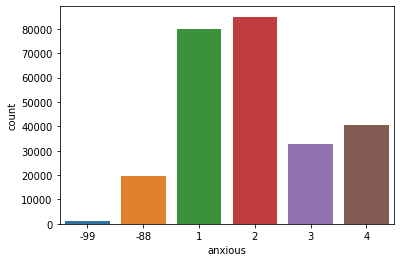

In [106]:
sns.countplot(data["anxious"]);
# view the count in each category of the anxious column
# this column is ordinal as the numbers are in a scale (ordered) from not anxious 1
  # to is anxious 4

In [123]:
data["anxious"].value_counts()
# 1 is not at all
# 2 is several days
# 3 is more than half the days
# 4 is nearly every day

 2     84969
 1     80067
 4     40476
 3     32624
-88    19557
-99    1234 
Name: anxious, dtype: int64

In [133]:
data.loc[data["worry"] == 4, :].head(10)
# looks at rows only where worry is a 4. 
# can check out other attributes that go along with the 4 (per individual)
# note: just glancing here, the worry 4s go alongside anxious and interest 4s

,week,est_st,est_msa,tbirth_year,abirth_year,egender,agender,rhispanic,ahispanic,rrace,arace,eeduc,aeduc,ms,thhld_numper,ahhld_numper,thhld_numkid,ahhld_numkid,thhld_numadlt,wrkloss,expctloss,anywork,kindwork,rsnnowrk,unemppay,eip,eipspnd1,eipspnd2,eipspnd3,eipspnd4,eipspnd5,eipspnd6,eipspnd7,eipspnd8,eipspnd9,eipspnd10,eipspnd11,eipspnd12,eipspnd13,spndsrc1,spndsrc2,spndsrc3,spndsrc4,spndsrc5,spndsrc6,spndsrc7,prifoodsuf,curfoodsuf,childfood,foodsufrsn1,foodsufrsn2,foodsufrsn3,foodsufrsn4,foodsufrsn5,freefood,wherefree1,wherefree2,wherefree3,wherefree4,wherefree5,wherefree6,wherefree7,tspndfood,tspndprpd,foodconf,hlthstatus,anxious,worry,interest,down,hlthins1,hlthins2,hlthins3,hlthins4,hlthins5,hlthins6,hlthins7,hlthins8,delay,notget,tenure,mortlmth,mortconf,enroll1,enroll2,enroll3,teach1,teach2,teach3,teach4,teach5,compavail,comp1,comp2,comp3,intrntavail,intrnt1,intrnt2,intrnt3,tschlhrs,tstdy_hrs,ttch_hrs,income
2,7,6,NaN,1990,2,1,2,1,2,1,2,7,2,5,2,2,0,2,2,2,2,1,2,-88,-88,4,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,1,-99,-99,-99,-99,-99,-99,1,1,-88,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,300,200,4,3,4,4,4,4,1,2,2,2,2,2,2,2,1,1,3,1,4,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,8
27,7,12,33100.0,1947,2,2,2,1,2,1,2,5,2,3,1,2,0,2,1,2,2,2,-88,7,4,1,1,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,1,-99,-99,1,-99,2,2,-88,-99,1,1,-99,1,2,-88,-88,-88,-88,-88,-88,-88,278,0,3,3,4,4,4,4,2,2,1,2,2,2,2,2,1,1,2,1,4,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,4
45,7,51,NaN,1988,2,1,2,1,2,2,2,4,2,5,4,2,2,2,2,1,2,2,-88,11,4,1,1,-99,1,-99,-99,1,-99,1,-99,-99,-99,-99,-99,-99,-99,1,-99,-99,1,-99,1,2,3,-99,-99,-99,-99,-99,2,-88,-88,-88,-88,-88,-88,-88,220,0,1,2,4,4,4,4,2,2,2,1,2,2,2,2,2,2,3,1,1,1,-99,-99,1,-99,-99,-99,-99,3,-99,1,-99,3,-99,-99,1,0.0,0.0,0.0,2
51,7,53,42660.0,1982,2,1,2,1,2,1,2,7,2,5,1,2,0,2,1,2,2,1,1,-88,-88,3,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,1,-99,-99,-99,-99,-99,-99,1,1,-88,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,0,160,4,3,4,4,4,4,1,2,2,2,2,2,2,2,1,2,3,1,4,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,5
61,7,12,NaN,1958,2,1,2,1,2,1,2,4,2,1,3,2,0,2,3,1,2,1,1,-88,-88,2,-99,-99,-99,-99,-99,1,-99,1,-99,1,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,2,2,-88,1,-99,-99,-99,-99,2,-88,-88,-88,-88,-88,-88,-88,150,50,1,4,4,4,3,3,1,-99,-99,-99,-99,-99,-99,-99,1,1,3,2,2,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,3
77,7,21,NaN,1958,2,2,2,1,2,1,2,3,2,1,2,2,0,2,2,2,2,2,-88,10,2,1,1,1,1,-99,-99,-99,-99,1,1,-99,-99,-99,-99,1,1,-99,-99,-99,1,-99,3,3,-88,1,-99,-99,-99,-99,2,-88,-88,-88,-88,-88,-88,-88,35,0,2,4,3,4,4,4,1,2,1,2,1,1,2,2,1,1,1,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,1
85,7,26,NaN,1978,2,2,2,1,2,1,2,5,2,1,4,2,2,2,2,1,1,1,2,-88,-88,1,1,1,1,-99,-99,-99,1,-99,1,-99,-99,-99,-99,-99,-99,1,1,1,1,-99,3,3,1,1,-99,1,-99,-99,2,-88,-88,-88,-88,-88,-88,-88,300,50,1,4,4,4,4,4,1,2,2,2,2,2,2,2,1,1,2,1,3,1,-99,-99,1,1,1,-99,-99,2,1,1,-99,2,-99,1,-99,2.0,24.0,12.0,6
101,7,35,NaN,1954,2,1,2,1,2,4,2,6,2,3,1,2,0,2,1,2,2,2,-88,6,4,1,1,-99,1,-99,-99,-99,1,1,-99,-99,-99,-99,-99,1,-99,-99,-99,-99,-99,-99,2,2,-88,-99,1,1,1,-99,1,-99,-99,1,-99,-99,-99,-99,0,0,2,5,4,4,4,4,2,2,1,2,2,2,1,2,1,1,2,1,3,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,1
111,7,36,35620.0,1954,2,2,2,2,2,1,2,6,2,1,2,2,0,2,2,2,1,1,1,-88,-88,2,1,-99,1,-99,-99,-99,-99,1,1,1,-99,-99,-99,1,1,-99,-99,-99,1,-99,1,1,-88,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,350,50,3,3,4,4,3,3,1,2,1,2,2,2,2,1,1,2,1,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,5
117,7,41,NaN,1956,2,1,2,1,2,1,2,4,2,3,1,2,0,2,1,2,2,2,-88,12,2,1,1,-99,1,-99,-99,1,-99,1,1,1,-99,-99,-99,1,1,1,-99,-99,1,-99,3,3,-88,1,-99,1,-99,1,2,-88,-88,-88,-88,-88,-88,-88,40,0,2,5,4,4,4,3,2,2,1,2,2,2,2,2,1,1,3,1,4,-8

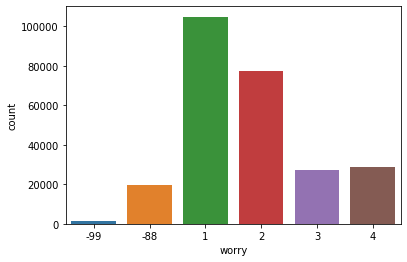

In [107]:
sns.countplot(data["worry"]);

In [124]:
data["worry"].value_counts()

 1     104835
 2     77486 
 4     28507 
 3     27170 
-88    19557 
-99    1372  
Name: worry, dtype: int64

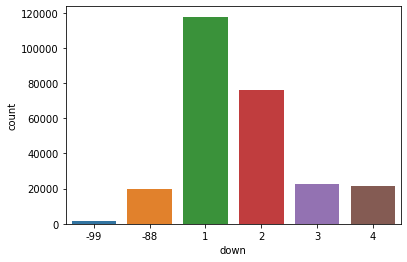

In [108]:
sns.countplot(data["down"]);

In [125]:
data["down"].value_counts()

 1     117747
 2     76266 
 3     22373 
 4     21648 
-88    19557 
-99    1336  
Name: down, dtype: int64

In [126]:
data.to_csv("data.csv")
# save new combined data frame in a csv
# this can be pulled into AWS for the model(s)

In [ ]:
# I did not do much EDA tonight in Python. I spent quite a bit of time researching the data
  # source/information and piecing together the data set to understand it better
# we will need to do some more EDA and EDA plots, discuss "missing values", processing, select columns for the model 
  # (random forest has a feature importance that would be fun to use and help select our independent variables) 
# we can discuss converting our nominal data types to categoricals and then one hot encoding 
  # that way we won't allow our model to process the nominal variables in a ranking (weights will be off)